# Student Data Analysis 

In [133]:
# Importing libraries

import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from scipy import stats # for statistical tests

from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.cluster import KMeans # for k-means clustering
from sklearn.tree import DecisionTreeClassifier # for decision tree classification
from sklearn.metrics import accuracy_score # for accuracy score
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.decomposition import PCA # for PCA|

import warnings
warnings.filterwarnings('ignore')


### Data Import

In [134]:
# Importing the datasets

df1 = pd.read_excel('interview_student_profile.xlsx')
df2 = pd.read_excel('interview_grades.xlsx')

# Merge both df1 and df2 into one single dataset (df)

df = pd.merge(df1, df2, on='student_pk', how='right')

In [135]:
df.head()

,student_pk,person_uid,profile_academic_year,profile_academic_year_desc,profile_academic_period_desc,profile_college,profile_college_desc,profile_residence,profile_residence_desc,profile_high_school_percentile,...,profile_highest_act_composite,profile_highest_act_englwrit,academic_period,academic_period_desc,course_pk,subject_pk,college,college_desc,course_grade,credit_hours
0,1,1386153,2016,Academic Year 2015-2016,Fall 2015,AB,School of Agr and Bio Engr,R,Resident,NaN,...,NaN,NaN,201610,Fall 2015,4926,153,MS,School of Materials Engr,4.0,1
1,1,1386153,2016,Academic Year 2015-2016,Fall 2015,AB,School of Agr and Bio Engr,R,Resident,NaN,...,NaN,NaN,201610,Fall 2015,14150,149,LA,College of Liberal Arts,4.0,4
2,1,1386153,2016,Academic Year 2015-2016,Fall 2015,AB,School of Agr and Bio Engr,R,Resident,NaN,...,NaN,NaN,201610,Fall 2015,12723,65,E,First Year Engineering,4.0,2
3,1,1386153,2016,Academic Year 2015-2016,Fall 2015,AB,School of Agr and Bio Engr,R,Resident,NaN,...,NaN,NaN,201610,Fall 2015,3090,39,S,College of Science,4.0,4
4,1,1386153,2016,Academic Year 2015-2016,Fall 2015,AB,School of Agr and Bio Engr,R,Resident,NaN,...,NaN,NaN,201610,Fall 2015,5720,257,S,College of Science,2.3,4


### Descriptive Analysis

In [136]:
df1.describe(include='all')

,student_pk,person_uid,profile_academic_year,profile_academic_year_desc,profile_academic_period_desc,profile_college,profile_college_desc,profile_residence,profile_residence_desc,profile_high_school_percentile,profile_highest_sat_math,profile_highest_sat_writing,profile_highest_sat_crit_read,profile_highest_act_english,profile_highest_act_math,profile_highest_act_reading,profile_highest_act_sci_reason,profile_highest_act_composite,profile_highest_act_englwrit
count,6848.000000,6.848000e+03,6848.0,6848,6848,6848,6848,6848,6848,3035.000000,4968.000000,4968.000000,4968.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3756.000000
unique,NaN,NaN,NaN,2,1,26,26,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Academic Year 2015-2016,Fall 2015,S,College of Science,R,Resident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,6773,6848,1033,1033,3525,3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3424.500000,1.482337e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,84.338386,632.548309,576.884058,579.458535,27.570015,28.369102,27.915779,27.594368,27.716388,25.912141
std,1976.991654,4.672093e+04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14.218090,94.700888,83.175555,81.756245,4.780070,4.461512,4.944812,4.471239,3.981336,3.935059
min,1.000000,1.041498e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,350.000000,290.000000,320.000000,11.000000,15.000000,13.000000,15.000000,16.000000,13.000000
25%,1712.750000,1.464188e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,78.000000,560.000000,520.000000,520.000000,24.000000,25.000000,24.000000,24.000000,25.000000,23.000000
50%,3424.500000,1.493379e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,630.000000,570.000000,580.000000,28.000000,28.000000,28.000000,27.000000,28.000000,26.000000
75%,5136.250000,1.510362e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,700.000000,640.000000,630.000000,32.000000,32.000000,32.000000,31.000000,31.000000,29.000000


In [137]:
# Number of unique students

len(df1)

6848

In [138]:
df.describe(include='all')

,student_pk,person_uid,profile_academic_year,profile_academic_year_desc,profile_academic_period_desc,profile_college,profile_college_desc,profile_residence,profile_residence_desc,profile_high_school_percentile,...,profile_highest_act_composite,profile_highest_act_englwrit,academic_period,academic_period_desc,course_pk,subject_pk,college,college_desc,course_grade,credit_hours
count,208516.000000,2.085160e+05,208516.0,208516,208516,208516,208516,208516,208516,90801.000000,...,122149.000000,116388.000000,208516.000000,208516,208516.000000,208516.000000,208516,208516,208516.000000,208516.000000
unique,NaN,NaN,NaN,2,1,26,26,3,3,NaN,...,NaN,NaN,NaN,15,NaN,NaN,25,25,NaN,NaN
top,NaN,NaN,NaN,Academic Year 2015-2016,Fall 2015,S,College of Science,R,Resident,NaN,...,NaN,NaN,NaN,Fall 2015,NaN,NaN,S,College of Science,NaN,NaN
freq,NaN,NaN,NaN,206479,208516,29278,29278,104910,104910,NaN,...,NaN,NaN,NaN,31692,NaN,NaN,61435,61435,NaN,NaN
mean,3415.151801,1.482304e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,84.824804,...,27.853081,26.006513,201750.145121,NaN,8837.878264,184.802461,NaN,NaN,3.114011,2.996398
std,1979.275260,4.631376e+04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14.055209,...,3.938891,3.907816,114.141579,NaN,5019.092459,100.331865,NaN,NaN,1.000724,0.796198
min,1.000000,1.041498e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,...,16.000000,13.000000,201610.000000,NaN,9.000000,7.000000,NaN,NaN,0.000000,1.000000
25%,1693.000000,1.464191e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,78.000000,...,25.000000,23.000000,201620.000000,NaN,4521.000000,101.000000,NaN,NaN,2.700000,3.000000
50%,3423.000000,1.493307e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,89.000000,...,28.000000,26.000000,201720.000000,NaN,9058.000000,202.000000,NaN,NaN,3.300000,3.000000
75%,5123.000000,1.510150e+06,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,96.000000,...,31.000000,29.000000,201820.000000,NaN,13076.000000,257.000000,NaN,NaN,4.000000,3.000000


In [139]:
# Create 2 new features academic term and year

df["academic_term"] = df2["academic_period_desc"].apply(lambda x: x.split(" ")[0])
df["academic_year"] = df2["academic_period_desc"].apply(lambda x: x.split(" ")[1])


df4 = df[['student_pk','credit_hours','academic_year']]
df4 = df4.drop_duplicates()
df4['credit_hours_avg'] = df.groupby(['student_pk', 'academic_year'])['credit_hours'].transform('mean')
df4['credit_hours_sum'] = df.groupby(['student_pk', 'academic_period_desc'])['credit_hours'].transform('sum')


df4.describe()

,student_pk,credit_hours,credit_hours_avg,credit_hours_sum
count,73137.000000,73137.000000,73137.000000,73137.000000
mean,3412.802973,2.920861,3.027313,13.554781
std,1977.030511,1.129471,0.414342,3.186083
min,1.000000,1.000000,1.000000,1.000000
25%,1690.000000,2.000000,2.800000,12.000000
50%,3420.000000,3.000000,3.000000,14.000000
75%,5119.000000,4.000000,3.222222,16.000000
max,6848.000000,10.000000,10.000000,25.000000


### Exploratory Data Analysis

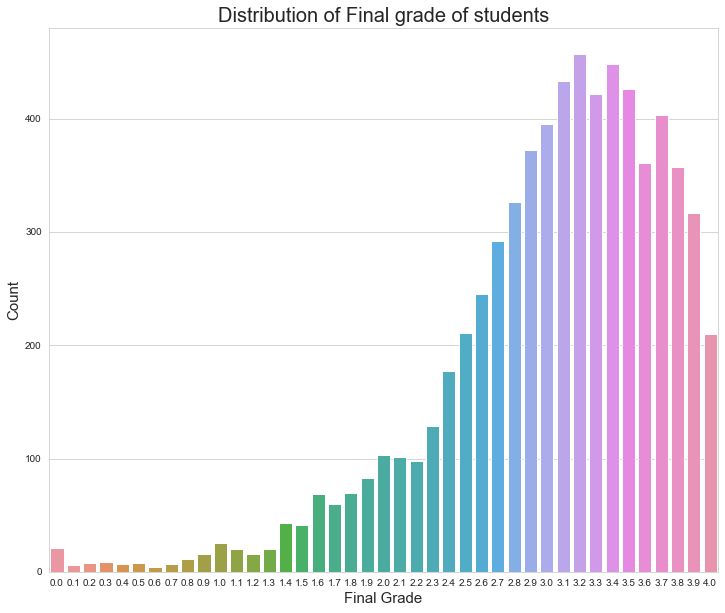

In [140]:
# Setting the target variable

df['course_grade_avg'] = df.groupby('student_pk')['course_grade'].transform('mean')

# calculating average course grade for each student

df3 = df[['student_pk','course_grade_avg']]
df3 = df3.drop_duplicates()
df3['course_grade_avg'] = df3['course_grade_avg'].apply(lambda course_grade_avg: round(course_grade_avg, 1))


plt.subplots(figsize=(12,10))
b = sns.countplot(df3['course_grade_avg'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 20)
b.set_xlabel('Final Grade', fontsize = 15)
b.set_ylabel('Count', fontsize = 15)
plt.show()




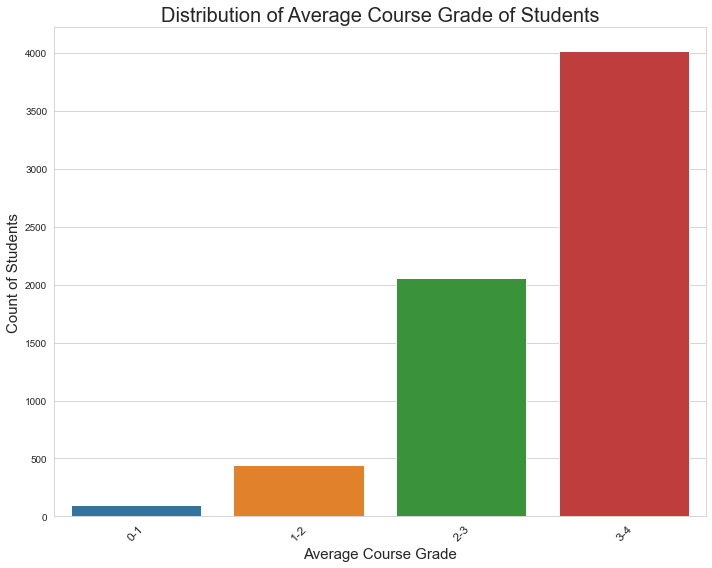

In [141]:
from matplotlib.ticker import MaxNLocator

bins = [0, 1, 2, 3, 4]
labels = ['0-1', '1-2', '2-3', '3-4']
df3['course_grade_avg'] = pd.cut(df3['course_grade_avg'], bins=bins, labels=labels, right=False)

plt.subplots(figsize=(10,8))
b = sns.countplot(df3['course_grade_avg'])
b.axes.set_title('Distribution of Average Course Grade of Students', fontsize = 20)
b.set_xlabel('Average Course Grade', fontsize = 15)
b.set_ylabel('Count of Students', fontsize = 15)
b.set_xticklabels(b.get_xticklabels(), rotation=45, fontsize=12)
b.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


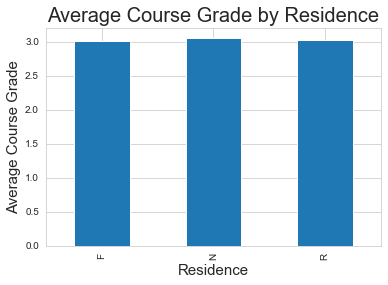

In [142]:
df4 = df[['student_pk','profile_residence','course_grade_avg']]
df4 = df4.drop_duplicates()
df4['course_grade_avg'] = df4['course_grade_avg'].apply(lambda course_grade_avg: round(course_grade_avg, 1))

performance_by_residence = df4.groupby("profile_residence")["course_grade_avg"].mean()

# Plot the average course grade trend by residence

plt.subplots(figsize=(6,4))
performance_by_residence.plot(kind='bar')
plt.xlabel("Residence", fontsize = 15)
plt.ylabel("Average Course Grade", fontsize = 15)
plt.title("Average Course Grade by Residence", fontsize = 20)
plt.show()

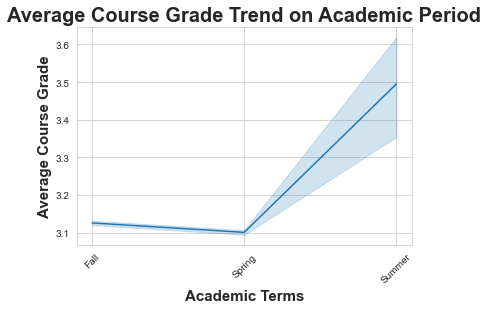

In [143]:
import seaborn as sns

df2["academic_term"] = df2["academic_period_desc"].apply(lambda x: x.split(" ")[0])

# Group the data by academic period and compute the average course grade for each group

average_grades = df2.groupby("academic_term")["course_grade"].mean()

plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.lineplot(x="academic_term", y="course_grade", data=df2)
plt.xlabel("Academic Terms", fontsize = 15, fontweight='bold')
plt.ylabel("Average Course Grade", fontsize = 15, fontweight='bold')
plt.title("Average Course Grade Trend on Academic Period",fontsize = 20, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


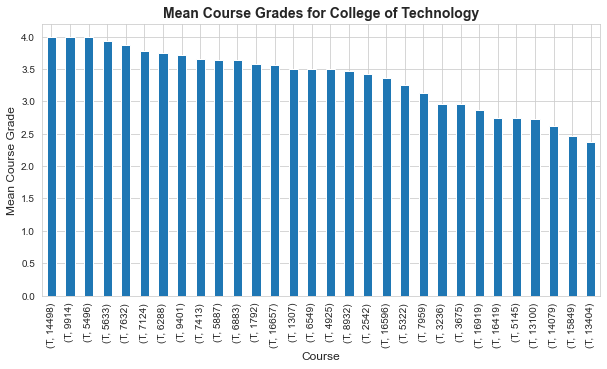

In [144]:
# Filter the data to only include rows with college value "T"

df_LA = df[df['college'] == 'T']

# group the filtered data by course and calculate the mean course grade for each group

grouped_data = df_LA.groupby(['college','course_pk'])['course_grade'].mean()
grouped_data = grouped_data.sort_values(ascending=False) 

grouped_data.plot(kind='bar', figsize=(10,5))

plt.xlabel('Course', fontsize=12)
plt.ylabel('Mean Course Grade', fontsize=12)
plt.title('Mean Course Grades for College of Technology', fontsize=14, fontweight='bold')
plt.show()

### Feature Selection

course_grade_avg                  1.000000
course_grade                      0.580961
profile_high_school_percentile    0.358470
profile_highest_act_englwrit      0.237205
profile_highest_act_composite     0.232883
profile_highest_act_english       0.225289
profile_highest_act_math          0.204583
profile_highest_sat_writing       0.202192
profile_highest_act_reading       0.185949
profile_highest_act_sci_reason    0.184241
Name: course_grade_avg, dtype: float64
person_uid                       -0.075139
student_pk                       -0.056308
credit_hours                     -0.055773
course_pk                         0.003636
subject_pk                        0.034362
academic_period                   0.037136
profile_highest_sat_crit_read     0.158277
profile_highest_sat_math          0.168164
profile_highest_act_sci_reason    0.184241
profile_highest_act_reading       0.185949
Name: course_grade_avg, dtype: float64


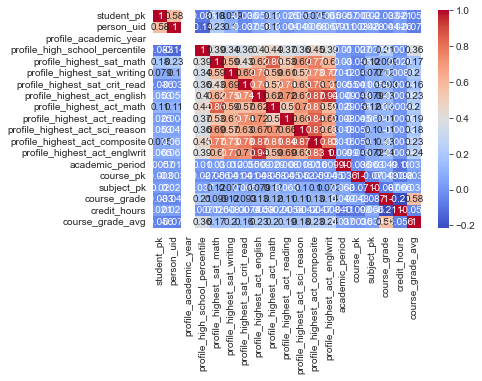

In [145]:
# Used Pearson Correlation for feature selection. There are other powerful ways to select features like 
# Lasso Regression, Decision Tree, etc.


import seaborn as sns

# Compute the correlation matrix

corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Extract the correlation values of the output variable

corr_output = corr_matrix['course_grade_avg']
sorted_corr = corr_output.sort_values(ascending=False)

# Print the top 10 features with the highest correlation values
print(sorted_corr.head(10))

sorted_corr = corr_output.sort_values(ascending=True)

print(sorted_corr.head(10))


In [146]:
df.drop(["student_pk", "subject_pk", "course_pk", "person_uid", "course_grade", "academic_period"], axis=1, inplace=True)

## Data Pre-processing

### Missing Values

In [147]:
df.isnull().sum()

profile_academic_year                  0
profile_academic_year_desc             0
profile_academic_period_desc           0
profile_college                        0
profile_college_desc                   0
profile_residence                      0
profile_residence_desc                 0
profile_high_school_percentile    117715
profile_highest_sat_math           57812
profile_highest_sat_writing        57812
profile_highest_sat_crit_read      57812
profile_highest_act_english        86367
profile_highest_act_math           86367
profile_highest_act_reading        86367
profile_highest_act_sci_reason     86367
profile_highest_act_composite      86367
profile_highest_act_englwrit       92128
academic_period_desc                   0
college                                0
college_desc                           0
credit_hours                           0
academic_term                          0
academic_year                          0
course_grade_avg                       0
dtype: int64

In [148]:
from sklearn.impute import SimpleImputer

# specify the columns you want to impute
numeric_cols = ['profile_high_school_percentile', 'profile_highest_sat_math', 'profile_highest_sat_writing', 'profile_highest_sat_crit_read',
                'profile_highest_act_english', 'profile_highest_act_math', 'profile_highest_act_reading',
                'profile_highest_act_sci_reason', 'profile_highest_act_composite', 'profile_highest_act_englwrit']

# create a copy of the dataframe
data_numeric = df[numeric_cols].copy()

imputer = SimpleImputer(strategy='mean')
data_numeric_imputed = imputer.fit_transform(data_numeric)

# replace the original columns with the imputed columns
for i, col in enumerate(numeric_cols):
    df[col] = data_numeric_imputed[:, i]
    
    
# P.S: You can also drop columns if the missing data is way too high and the feature is not that important.
# Also, you can use fancyImpute to impute the missing values using KNN. We can use different strategies to see what gives the best result.

In [149]:
df.drop_duplicates(inplace=True)

### Numerical and Categorical data split

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150919 entries, 0 to 208515
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   profile_academic_year           150919 non-null  int64  
 1   profile_academic_year_desc      150919 non-null  object 
 2   profile_academic_period_desc    150919 non-null  object 
 3   profile_college                 150919 non-null  object 
 4   profile_college_desc            150919 non-null  object 
 5   profile_residence               150919 non-null  object 
 6   profile_residence_desc          150919 non-null  object 
 7   profile_high_school_percentile  150919 non-null  float64
 8   profile_highest_sat_math        150919 non-null  float64
 9   profile_highest_sat_writing     150919 non-null  float64
 10  profile_highest_sat_crit_read   150919 non-null  float64
 11  profile_highest_act_english     150919 non-null  float64
 12  profile_highest_

In [151]:
df['academic_year'] = df['academic_year'].astype('float')

cat_data = df.select_dtypes(include=['object'])
cat_data.drop(["profile_academic_year_desc", "profile_college", "profile_academic_period_desc", "profile_college_desc", "profile_residence_desc", "academic_period_desc", "college_desc" ], axis=1, inplace=True)

cat_data.head()

,profile_residence,college,academic_term
0,R,MS,Fall
1,R,LA,Fall
2,R,E,Fall
3,R,S,Fall
5,R,S,Spring


In [152]:


# Get dummies for column 'B'
dummies = pd.get_dummies(cat_data['college'])

# Concatenate the dummies dataframe to the original dataframe
cat_data = pd.concat([cat_data, dummies], axis=1)

# Drop the original column 'B'
cat_data.drop(columns='college', inplace=True)


# Label encoding

d = {'R': 0, 'N': 1, 'F': 2}
cat_data['profile_residence'] = cat_data['profile_residence'].map(d)

d = {'Fall': 0, 'Spring': 1, 'Summer': 2}
cat_data['academic_term'] = cat_data['academic_term'].map(d)

cat_data.shape

(150919, 27)

In [153]:
cat_data.head()

,profile_residence,academic_term,0,A,AE,BE,CE,CH,CN,E,...,LA,M,ME,MS,NE,PC,PI,S,T,VM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [154]:
num_data = df.select_dtypes(include=['float64', 'int64', 'int32'])

num_data = num_data.astype('float32')

num_data.shape

(150919, 14)

In [155]:
num_data.head()

,profile_academic_year,profile_high_school_percentile,profile_highest_sat_math,profile_highest_sat_writing,profile_highest_sat_crit_read,profile_highest_act_english,profile_highest_act_math,profile_highest_act_reading,profile_highest_act_sci_reason,profile_highest_act_composite,profile_highest_act_englwrit,credit_hours,academic_year,course_grade_avg
0,2016.0,84.824806,660.0,590.0,690.0,27.667791,28.604204,28.004625,27.749887,27.853081,26.006514,1.0,2015.0,3.412121
1,2016.0,84.824806,660.0,590.0,690.0,27.667791,28.604204,28.004625,27.749887,27.853081,26.006514,4.0,2015.0,3.412121
2,2016.0,84.824806,660.0,590.0,690.0,27.667791,28.604204,28.004625,27.749887,27.853081,26.006514,2.0,2015.0,3.412121
3,2016.0,84.824806,660.0,590.0,690.0,27.667791,28.604204,28.004625,27.749887,27.853081,26.006514,4.0,2015.0,3.412121
5,2016.0,84.824806,660.0,590.0,690.0,27.667791,28.604204,28.004625,27.749887,27.853081,26.006514,4.0,2016.0,3.412121


In [156]:
data = pd.concat([cat_data, num_data], axis = 1)
data = data.astype('float64')

data = data.apply(lambda data: round(data, 1))

In [157]:
data = data.dropna()

In [158]:
data.head()

,profile_residence,academic_term,0,A,AE,BE,CE,CH,CN,E,...,profile_highest_sat_crit_read,profile_highest_act_english,profile_highest_act_math,profile_highest_act_reading,profile_highest_act_sci_reason,profile_highest_act_composite,profile_highest_act_englwrit,credit_hours,academic_year,course_grade_avg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,690.0,27.7,28.6,28.0,27.7,27.9,26.0,1.0,2015.0,3.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,690.0,27.7,28.6,28.0,27.7,27.9,26.0,4.0,2015.0,3.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,690.0,27.7,28.6,28.0,27.7,27.9,26.0,2.0,2015.0,3.4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,690.0,27.7,28.6,28.0,27.7,27.9,26.0,4.0,2015.0,3.4
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,690.0,27.7,28.6,28.0,27.7,27.9,26.0,4.0,2016.0,3.4


### Train Test Split and Standardization

In [159]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Split the data into features (X) and target (y)
X = data.drop("course_grade_avg", axis=1)
y = data["course_grade_avg"]


X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size = 0.33, random_state = 40)

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)


In [160]:
pd.DataFrame(X_train).head()

,profile_residence,academic_term,0,A,AE,BE,CE,CH,CN,E,...,profile_highest_sat_writing,profile_highest_sat_crit_read,profile_highest_act_english,profile_highest_act_math,profile_highest_act_reading,profile_highest_act_sci_reason,profile_highest_act_composite,profile_highest_act_englwrit,credit_hours,academic_year
0,-0.898050,-0.922223,-0.046802,-0.243915,-0.107821,-0.066336,-0.118533,-0.098212,-0.044406,-0.190723,...,0.428450,-0.021584,1.719074,-0.200236,1.047165,0.642381,0.683162,1.692255,0.026355,1.037152
1,1.825392,-0.922223,-0.046802,-0.243915,-0.107821,-0.066336,-0.118533,-0.098212,-0.044406,-0.190723,...,1.848278,0.267640,-0.014419,-0.020639,-0.016657,-0.030149,-0.013455,-0.020458,-2.207453,1.037152
2,1.825392,1.075604,-0.046802,-0.243915,-0.107821,-0.066336,-0.118533,-0.098212,-0.044406,-0.190723,...,-0.423447,-0.600034,-0.014419,-0.020639,-0.016657,-0.030149,-0.013455,-0.020458,1.143260,1.037152
3,0.463671,-0.922223,-0.046802,-0.243915,-0.107821,-0.066336,-0.118533,-0.098212,-0.044406,-0.190723,...,-0.018796,-0.017246,-1.032502,-1.696885,0.515254,0.057573,-0.643726,-1.048086,0.026355,-1.398476
4,-0.898050,-0.922223,-0.046802,-0.243915,-0.107821,-0.066336,-0.118533,-0.098212,-0.044406,-0.190723,...,0.712415,0.990702,-0.014419,-0.020639,-0.016657,-0.030149,-0.013455,-0.020458,0.026355,1.849028


## MODEL BUILDING

### Linear Regression

In [161]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Create an instance of the LinearRegression model
model = LinearRegression()


# Define the hyperparameters to be tuned and their possible values
hyperparameters = {'fit_intercept':[True,False], 'normalize':[True,False]}


# Create an instance of the GridSearchCV model with the hyperparameters and the model
grid = GridSearchCV(model, hyperparameters, cv=5)


# Fit the model to the training data
grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)


# Get the best model

best_model = grid.best_estimator_
y_predict = best_model.predict(X_train)


# Evaluate the performance of the model
rmse = np.sqrt(mean_squared_error(y_train, y_predict))
print("RMSE:", rmse)



Best Hyperparameters: {'fit_intercept': True, 'normalize': True}
RMSE: 0.561167000747081


### XGBoost Regression

In [162]:
from numpy import sqrt
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}


clf =  xgb.XGBRegressor()

rs_model=RandomizedSearchCV(clf,param_distributions=params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

# This will give evaluation for train and test data as well

rs_model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)],
    eval_metric = 'rmse',
    early_stopping_rounds = 10)


# Get the best estimator from the RandomizedSearchCV object
best_model = rs_model.best_estimator_

# Get the feature importances
importances = best_model.feature_importances_


feature_names = pd.DataFrame(X_train).columns
features = list(zip(feature_names, importances))
features.sort(key=lambda x: x[1], reverse=True)


# Print the features and their importances
print("Features and their importances:")
for feature in features:
    print("\t{}: {}".format(feature[0], feature[1]))
    


# This part is redundant but I have included anyway    
    
y_predicted_t = best_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_predicted_t))
print("Root Mean Squared Error on train data: ", rmse)

    
y_predicted = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("Root Mean Squared Error on test data: ", rmse)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[0]	validation_0-rmse:2.16337	validation_1-rmse:2.16338
[1]	validation_0-rmse:1.75760	validation_1-rmse:1.75776
[2]	validation_0-rmse:1.43857	validation_1-rmse:1.43894
[3]	validation_0-rmse:1.18870	validation_1-rmse:1.18948
[4]	validation_0-rmse:0.99083	validation_1-rmse:0.99252
[5]	validation_0-rmse:0.83966	validation_1-rmse:0.84243
[6]	validation_0-rmse:0.72275	validation_1-rmse:0.72633
[7]	validation_0-rmse:0.63389	validation_1-rmse:0.63858
[8]	validation_0-rmse:0.56580	validation_1-rmse:0.57142
[9]	validation_0-rmse:0.51720	validation_1-rmse:0.52420
[10]	validation_0-rmse:0.48156	validation_1-rmse:0.48965
[11]	validation_0-rmse:0.44962	validation_1-rmse:0.45882
[12]	validation_0-rmse:0.42635	validation_1-rmse:0.43617
[13]	validation_0-rmse:0.40798	validation_1-rmse:0.41857
[14]	validation_0-rmse:0.39615	validation_1-rmse:0.40738
[15]	validation_0-rmse:0.38992	validation_1-rmse:0.40172
[16]	validation_0-rmse:0.38408	validat

                                importance
profile_highest_sat_math           10144.0
profile_highest_sat_crit_read       9503.0
profile_highest_sat_writing         8417.0
profile_high_school_percentile      7843.0
profile_highest_act_math            5666.0
profile_highest_act_reading         4783.0
profile_highest_act_english         4590.0
profile_highest_act_sci_reason      4075.0
academic_year                       3846.0
profile_highest_act_englwrit        3466.0
profile_residence                   2815.0
profile_highest_act_composite       2802.0
academic_term                       1573.0
credit_hours                        1261.0
S                                   1177.0
LA                                   637.0
HH                                   453.0
EC                                   324.0
A                                    276.0
PI                                   263.0
M                                    235.0
ME                                   184.0
E          

<AxesSubplot:>

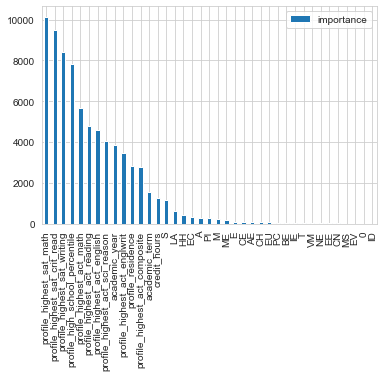

In [163]:
# Get the feature importances
f_importance = best_model.get_booster().get_score(importance_type='weight')


# Convert the feature importances to a pandas dataframe
importance_df = pd.DataFrame.from_dict(data=f_importance, orient='index', columns=['importance'])
                                      
                                      
# Sort the feature importances in descending order
importance_df.sort_values(by='importance', ascending=False, inplace=True)


print(importance_df)
importance_df.plot.bar()


### Random Forest Regression

In [132]:
from sklearn.ensemble import RandomForestRegressor
from numpy import absolute
from pandas import read_csv

# Use the parameter grid to search for best hyperparameters

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rf = RandomForestRegressor()


# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

best_model = rf_random.best_estimator_

y_predicted_t = best_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_predicted_t))
print("Root Mean Squared Error for train data: ", rmse) 

y_predicted = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("Root Mean Squared Error for test data: ", rmse) 


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Root Mean Squared Error:  0.5663148184473066
